In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("Titanic.csv")
#reading dataset using pandas

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Target Variable= Passengers who survived
# SibSp is sibling spouse; Parch is Parent child

In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.shape

(891, 12)

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df.isnull()
#Cabin column has a number of null values, we will be removing the column ahead

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

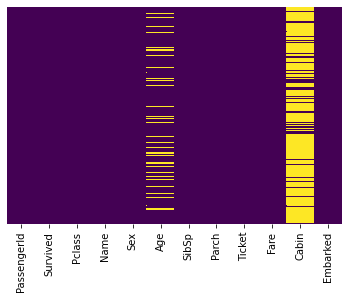

In [13]:
sns.heatmap(df.isnull(), yticklabels=False,cbar=False, cmap='viridis')
# to visualise the null values in the dataset

In [14]:
# from the heatmap we can observe, the cabin information for most passengers is missing.
# the age data of about 15% passengers is missing


In [15]:
#to check numeric and categorical variables
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

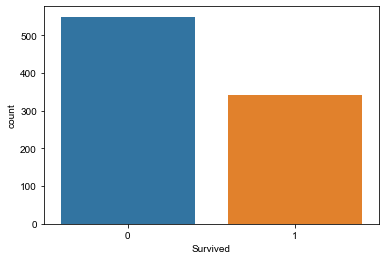

In [16]:
# people who survived
sns.countplot(x='Survived',data=df)
sns.set_style("whitegrid")

<AxesSubplot:xlabel='Survived', ylabel='count'>

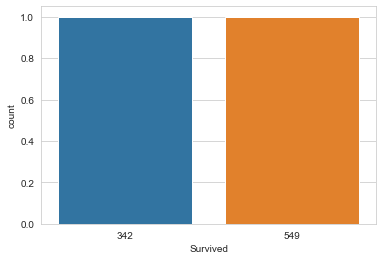

In [17]:
sns.countplot(x=df['Survived'].value_counts(),data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

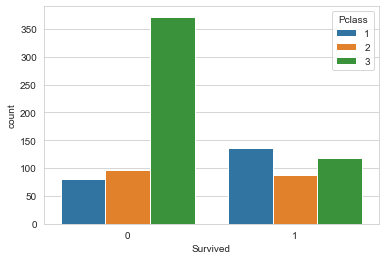

In [18]:
#people who survived (based on PClass)
sns.countplot(x='Survived', hue='Pclass', data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

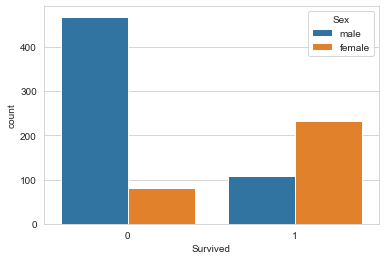

In [19]:
# people who survived (based on Sex)
sns.countplot(x='Survived', hue='Sex', data=df)

In [36]:
df.groupby(['Sex', 'Pclass']).mean()
# depicts that women were more likely to survive as compared to men (approx 3 times)

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Pclass                                                         
female 1        469.212766  0.968085  34.611765  0.553191  0.457447   
       2        443.105263  0.921053  28.722973  0.486842  0.605263   
       3        399.729167  0.500000  21.750000  0.895833  0.798611   
male   1        455.729508  0.368852  41.281386  0.311475  0.278689   
       2        447.962963  0.157407  30.740707  0.342593  0.222222   
       3        455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Sex    Pclass              
female 1       106.125798  
       2        21.970121  
       3        16.118810  
male   1        67.226127  
       2        19.741782  
       3        12.661633

<AxesSubplot:>

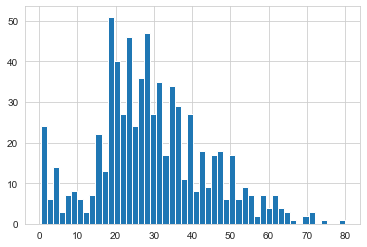

In [21]:
# Histogram depicting the ages of the passengers on Titanic
df['Age'].hist(bins=50)

In [22]:
# Mean age of the passengers on Titanic
df['Age'].mean()

29.69911764705882

<AxesSubplot:xlabel='SibSp', ylabel='count'>

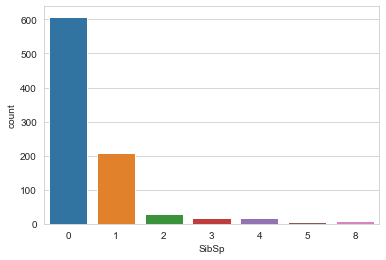

In [23]:
# counting the number of siblings/ spouse 
sns.countplot(x='SibSp', data=df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

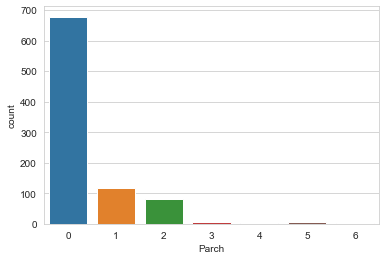

In [24]:
# counting the number of Parents/children 
sns.countplot(x='Parch', data=df)

In [25]:
#dropping a column (CABIN)
df.drop('Cabin',axis=1,inplace=True)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


/Users/natasha/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


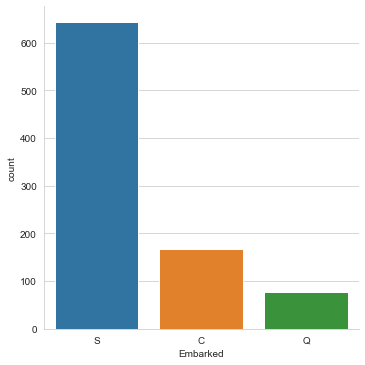

In [27]:
# to find out from where passengers embarked upon their journey on Titanic
sns.catplot('Embarked',data=df,kind='count')


In [47]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [48]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

/Users/natasha/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


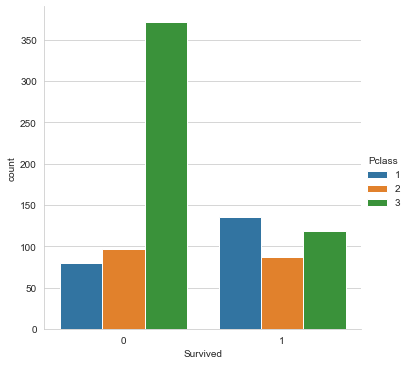

In [28]:
# relationship between passengers who survived and their respective class
sns.catplot('Survived',data=df,kind='count',hue='Pclass')

In [29]:
df['Fare'].mean()

32.2042079685746

<AxesSubplot:>

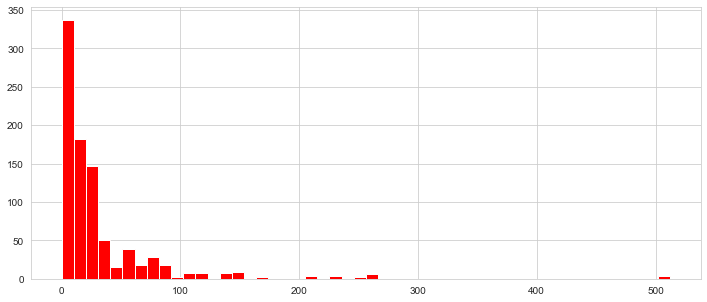

In [30]:
df['Fare'].hist(color='red', bins=50,figsize=(12,5))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

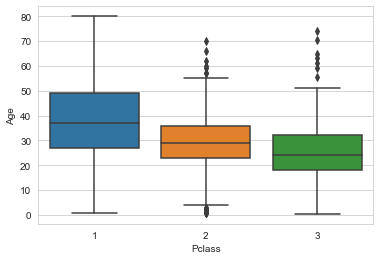

In [31]:
#relationship between passenger class (Pclass) and age
sns.boxplot(x='Pclass',
           y='Age',
           data=df)